# Programming Assignment: Polynomial fit
## Name : 백찬희
## Student ID : 20142503
## Github : https://github.com/Baekchanhee/assignment07.git

# Plot the noisy data & clean data

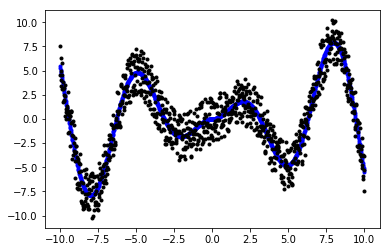

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)
y2      = y1 + nn * std

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

# Plot the polynomial curves that fits the noisy data by the least square error
## with varying p = 0,1,2,3,...9

## Minimize   $||A\theta - y_{1}||^2$

### define A with varying p = 0,1,2,3...,9  ( example  p = 2 )

In [3]:
def A(p, x):  # p = 0,1,2,3,...,9
     
    a = np.ones(num)
    x1 = x
    for i in range(p):
        a = np.c_[a, x1]
        x1 = x1 * x        

    return a

# example p = 2   (1, x, x2)
#a = A(4, x)
#a


###  $\theta = (A^TA)^{-1}A^Ty_{1}$

In [4]:
def O(A):
    AT = np.transpose(A)                  # transpose of A
    if(AT.ndim != 1) : 
        o = np.linalg.inv((np.matmul(AT, A))) # inverse of (transpose of A * A)
        o = np.matmul(o, AT)    
    else :                          # p = 0 이라 1차원 배열일때 inverse 대신 역수
        o = 1 / (np.matmul(AT, A))
        o = o * AT        
    
    o = np.matmul(o, y1)
    return o

#o = O(a)
#o


## model : $\hat{f}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^2 + .... + \theta_{p}x^p $

In [5]:
def model(p, x, i):  # i 는 parameter 출력을 위한 변수 
    a = A(p, x)      # error 와 중복방지
    o = O(a)
    
    if i == 0 :
        print("model parameters:")
        print(o)
    
    if o.ndim == 0 :  # p = 0 일때
        md = a * o
    else :
        md  = np.matmul(a, o)
    return md

## error : $\Sigma_{j=1}^{n}r^2_{j} $   where   $r_{j} = y_{j} - \hat{f}(x_{j}) $

In [6]:
def error(p, x, i):
    md = model(p, x ,i)    # model
    r2 = (y2 - md) ** 2 # r의 제곱
    s = np.sum(r2)         # error
    return s

## p = 0 ~ p = 9 까지 plot

model parameters:
-1.6740081543176188e-16


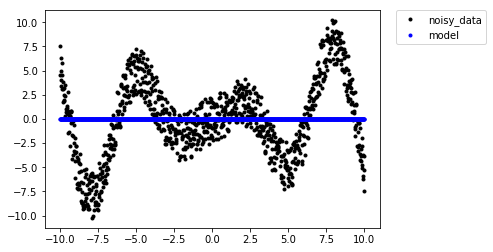

model parameters:
[-1.52655666e-16  2.05786450e-01]


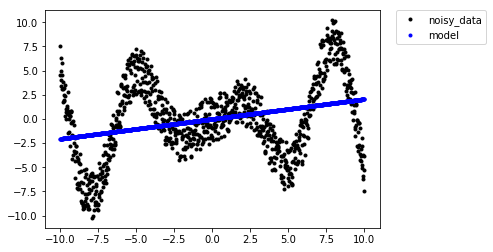

model parameters:
[ 2.80157841e-16  2.05786450e-01 -2.24971951e-17]


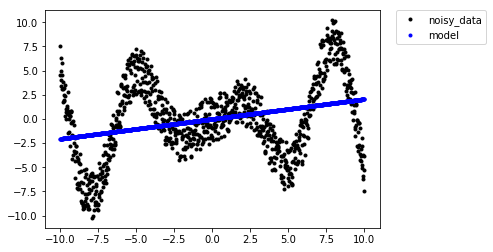

model parameters:
[ 9.28077060e-17 -1.05389769e-01 -6.91178885e-18  5.17592537e-03]


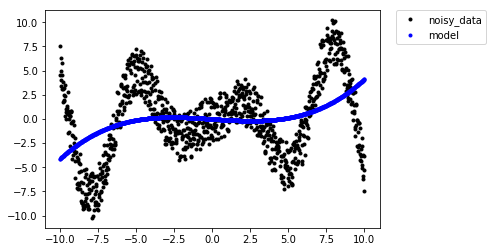

model parameters:
[-5.17814958e-16 -1.05389769e-01  7.19910243e-17  5.17592537e-03
 -1.07573184e-18]


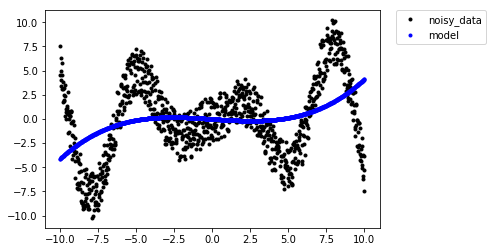

model parameters:
[ 6.93724592e-14 -1.44371556e+00 -6.01851468e-15  6.75069239e-02
  6.60702640e-17 -5.59862621e-04]


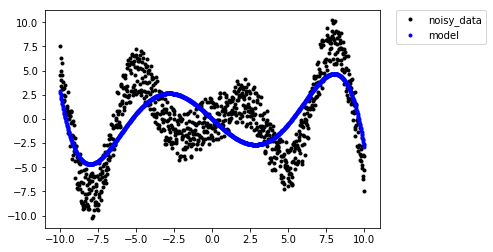

model parameters:
[ 1.68346240e-13 -1.44371556e+00 -3.11512968e-14  6.75069239e-02
  8.79287962e-16 -5.59862621e-04 -6.16322348e-18]


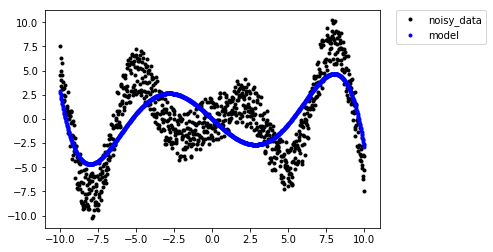

model parameters:
[-3.60485079e-13  4.36909750e-01  7.78561243e-14 -1.01414214e-01
 -2.28904217e-15  3.14903901e-03  1.64728850e-17 -2.29143441e-05]


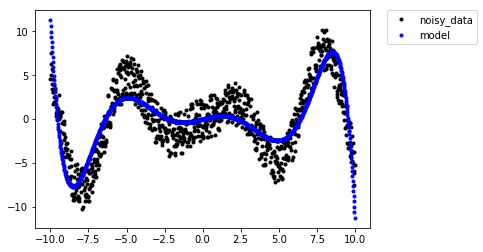

model parameters:
[-3.11189095e-12  4.36909750e-01  1.02586386e-12 -1.01414214e-01
 -5.30494973e-14  3.14903901e-03  8.79314643e-16 -2.29143441e-05
 -4.56106397e-18]


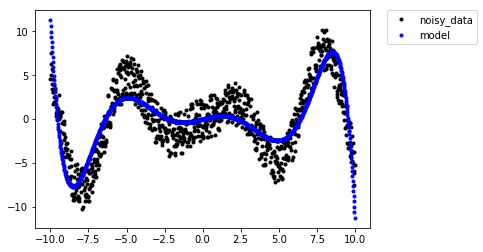

model parameters:
[ 1.29515461e-11  2.13058297e+00 -3.93530260e-12 -3.49330563e-01
  2.00077883e-13  1.27987281e-02 -3.30599585e-15 -1.60495278e-04
  1.71337163e-17  6.48406059e-07]


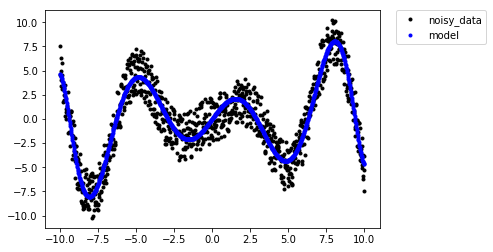

In [7]:
errors = []
for i in range(10):
    mod = model(i, x, 0)
    errors.append(error(i, x, 1))
    plt.plot(x, y2, 'k.', label="noisy_data") # plot noisy data
    plt.plot(x, mod, 'b.', label="model") # plot model
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## plot the error

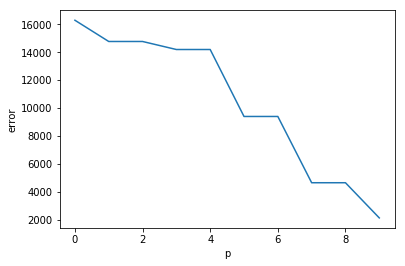

In [8]:
x_a = np.arange(10) # 0 ~ 9

plt.plot(x_a, errors, label= 'energy')

plt.xlabel('p')
plt.ylabel('error')
plt.show()